<a href="https://colab.research.google.com/github/RezaulKarim-506/Deep-Learning-Project/blob/master/CNN_MobileNet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
# 2. Load CIFAR-10 dataset directly from Keras
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# 3. Normalize the image data to the [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# 4. One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# 5. Display some sample images from the CIFAR-10 dataset
def plot_images(images, labels, class_names, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].set_title(class_names[labels[i]])
        axes[i].axis('off')
    plt.show()


In [ ]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

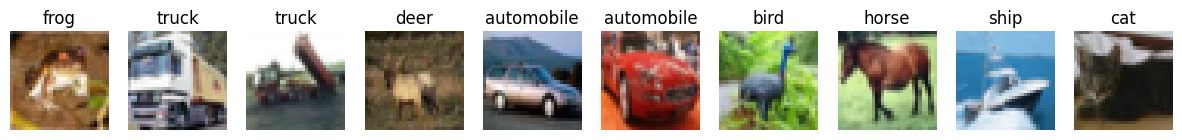

In [ ]:
# Display first 10 images from the training set
plot_images(x_train, np.argmax(y_train, axis=1), class_names, num_images=10)

In [ ]:
# 6. Build a Simple CNN model for CIFAR-10 classification
def build_simple_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
# 7. Build the MobileNetV2 model
def build_mobilenet_model(input_shape=(32, 32, 3), num_classes=10):
    base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False  # Freeze the base model layers

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

In [ ]:
# 8. Compile models
simple_cnn_model = build_simple_cnn()
mobilenet_model = build_mobilenet_model()

simple_cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
<ipython-input-13-807a3c24c7fc>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 9. Train both models
simple_cnn_history = simple_cnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
mobilenet_history = mobilenet_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 111ms/step - accuracy: 0.3253 - loss: 1.8346 - val_accuracy: 0.5255 - val_loss: 1.3246
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.5378 - loss: 1.2871 - val_accuracy: 0.5883 - val_loss: 1.1442
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.6056 - loss: 1.1121 - val_accuracy: 0.6243 - val_loss: 1.0656
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 80ms/step - accuracy: 0.6444 - loss: 1.0187 - val_accuracy: 0.6410 - val_loss: 1.0437
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.6729 - loss: 0.9301 - val_accuracy: 0.6758 - val_loss: 0.9230
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 77ms/step - accuracy: 0.6978 - loss: 0.8578 - val_accuracy: 0.6861 - val_loss: 0.9038
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 80ms/step - accuracy: 0.7172 - loss: 0.8122 - val_accuracy: 0.6962 - val_loss: 0.8803
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.7361 - loss: 0.7606 -

In [ ]:
# 10. Evaluate and compare the models
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_acc * 100:.2f}%")

    # Get the true labels and predicted labels
    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred, axis=1)  # Convert to class indices
    y_true = np.argmax(y_test, axis=1)

    # Classification Report and Confusion Matrix
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


Evaluating Simple CNN Model:
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7063 - loss: 0.8648
Test Accuracy: 70.49%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1000
           1       0.81      0.85      0.83      1000
           2       0.54      0.68      0.60      1000
           3       0.54      0.50      0.52      1000
           4       0.74      0.54      0.62      1000
           5       0.56      0.69      0.62      1000
           6       0.75      0.80      0.77      1000
           7       0.75      0.76      0.76      1000
           8       0.84      0.78      0.81      1000
           9       0.89      0.69      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.72      0.70      0.71     10000
weighted avg       0.72      0.70      0.71     10000



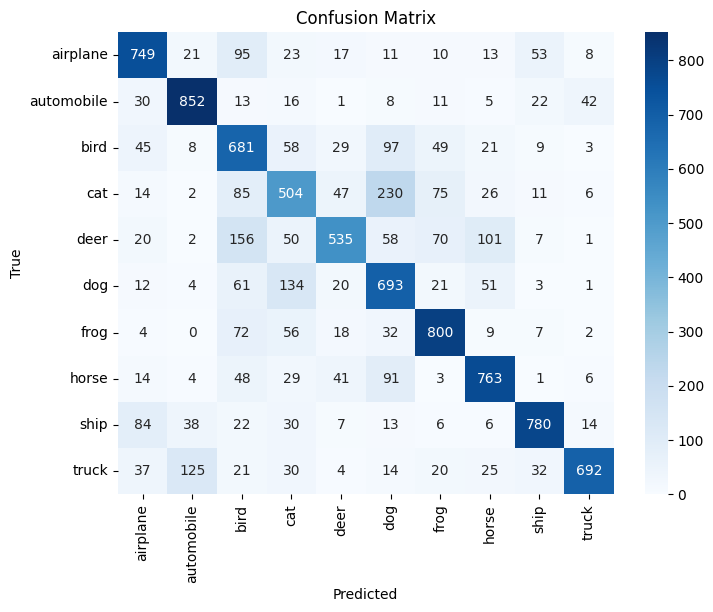

In [ ]:
# 11. Evaluate the Simple CNN model
print("\nEvaluating Simple CNN Model:")
evaluate_model(simple_cnn_model, x_test, y_test)


Evaluating MobileNetV2 Model:
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.3584 - loss: 1.8320
Test Accuracy: 35.35%
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.46      0.41      1000
           1       0.44      0.28      0.34      1000
           2       0.29      0.24      0.26      1000
           3       0.30      0.24      0.27      1000
           4       0.35      0.46      0.40      1000
           5       0.31      0.25      0.28      1000
           6       0.42      0.41      0.42      1000
           7       0.44      0.25      0.32      1000
           8       0.38      0.34      0.36      1000
           9       0.31      0.60      0.40      1000

    accuracy                           0.35     10000
   macro avg       0.36      0.35      0.35     10000
weighted avg       0.36      0.35      0.35     10000



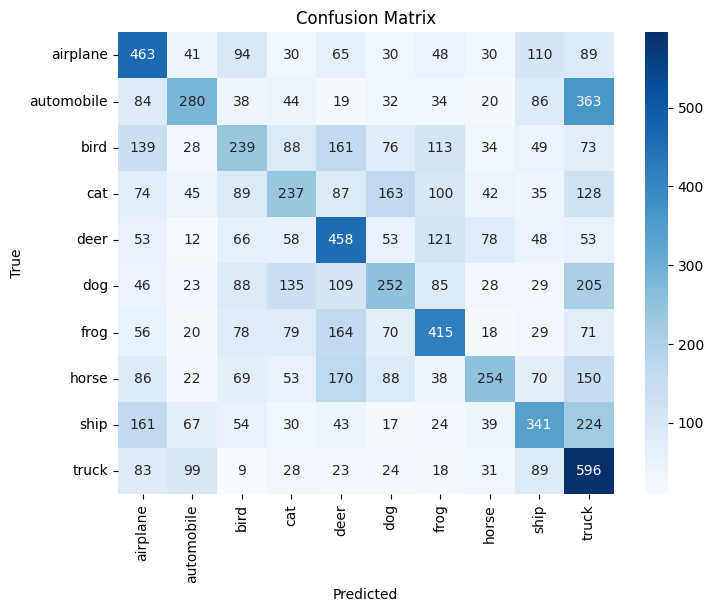

In [ ]:
# 12. Evaluate the MobileNetV2 model
print("\nEvaluating MobileNetV2 Model:")
evaluate_model(mobilenet_model, x_test, y_test)

In [ ]:
# 13. Plot training history (accuracy and loss)
def plot_history(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


Simple CNN Training History:


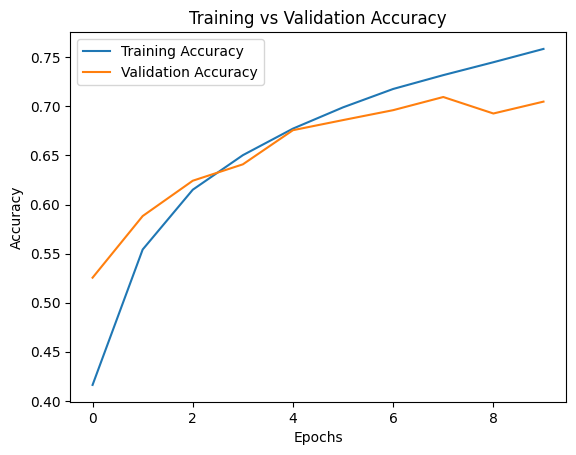

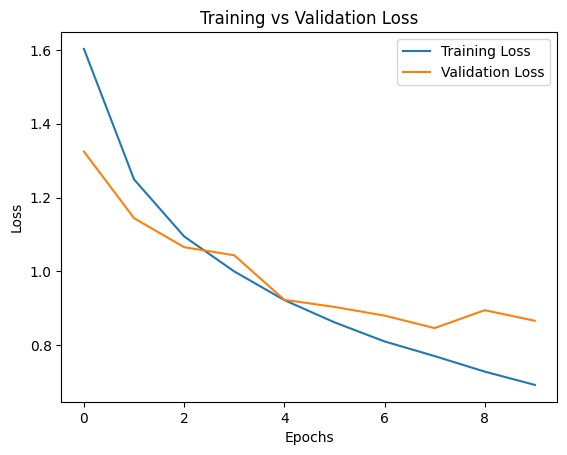


MobileNetV2 Training History:


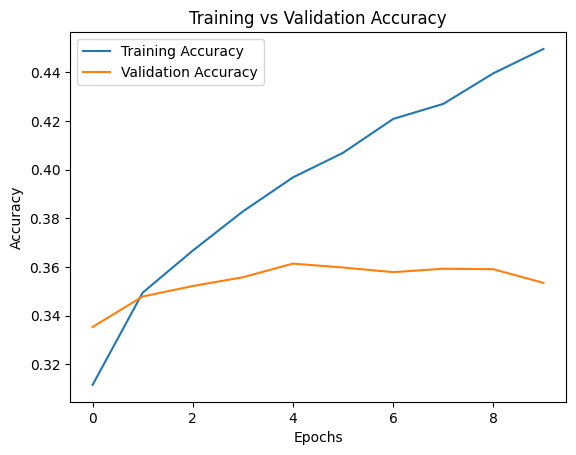

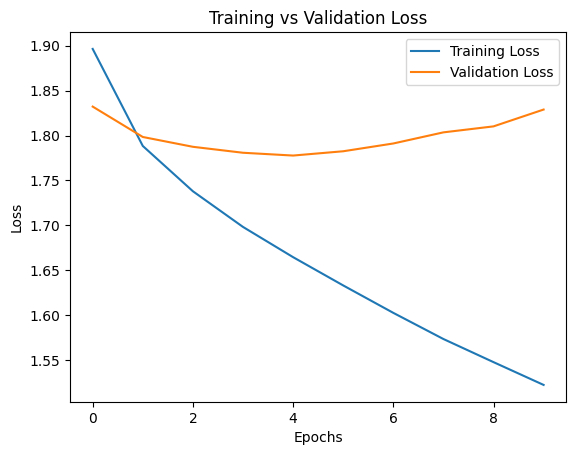

In [ ]:
# Plot the accuracy and loss graphs for both models
print("\nSimple CNN Training History:")
plot_history(simple_cnn_history)

print("\nMobileNetV2 Training History:")
plot_history(mobilenet_history)